In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
#data is derived from MIMIC-3

admissions = pd.read_csv(r"C:\Users\kappl\OneDrive\Documents\BIOE5860 Precision Medicine\ADMISSIONS.csv")
diagnoses = pd.read_csv(r"C:\Users\kappl\OneDrive\Documents\BIOE5860 Precision Medicine\DIAGNOSES_ICD.csv")
procedures = pd.read_csv(r"C:\Users\kappl\OneDrive\Documents\BIOE5860 Precision Medicine\PROCEDURES_ICD.csv")
patients = pd.read_csv(r"C:\Users\kappl\OneDrive\Documents\BIOE5860 Precision Medicine\PATIENTS.csv")
labevents = pd.read_csv(r"C:\Users\kappl\OneDrive\Documents\BIOE5860 Precision Medicine\LABEVENTS.csv")

# Convert date columns to pydatetime format to avoid numpy overflow issues
def convert_dates_to_pydatetime(df, date_columns):
    """Convert specified datetime columns to Python datetime objects."""
    for col in date_columns:
        if col in df.columns:
            # First convert to pandas datetime, then explicitly to Python datetime objects
            temp = pd.to_datetime(df[col])
            df[col] = temp.apply(lambda x: x.to_pydatetime() if pd.notna(x) else None)
            # Ensure dtype is object to store Python datetime objects
            df[col] = df[col].astype('object')
    return df

# Apply conversion to each dataframe
admissions = convert_dates_to_pydatetime(admissions, ['ADMITTIME', 'DISCHTIME'])
patients = convert_dates_to_pydatetime(patients, ['DOB', 'DOD'])
labevents = convert_dates_to_pydatetime(labevents, ['CHARTTIME'])


In [3]:
patients

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaT,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaT,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaT,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaT,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaT,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaT,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaT,NaN,NaN,0


In [ ]:
admissions
#note that for the admissions file, the time only indicates which hospital admission the event happened. Not the order.
#do not know the order of diagnoses or procedures within a single admission

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [ ]:
diagnoses
#you can sort by HADM_ID to find what happened in what order
#HADM_ID is hospital admission ID

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [6]:
procedures

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331
...,...,...,...,...,...
240090,228330,67415,150871,5,3736
240091,228331,67415,150871,6,3893
240092,228332,67415,150871,7,8872
240093,228333,67415,150871,8,3893


In [7]:
labevents

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN


In [ ]:
"""
First identify cohorts from diagnoses dataframe based on ICD9 codes.
Then go to admissions and pull all the demographics info for each patient with disease of interest for each cohort.
Then go back to diagnoses table to find all the other health conditions the patients had over their lifetimes.
NOTE this should be conditions diagnosed before the disease of interest. (for the purpose of finding odds of first event)
Then check lab evetns along with the admission time of the lab to see which visit the lab happened in.
Same deal with procedures.
"""

"""
Note that by taking only the taking the first occurence can cause issues in the model.
The model will identify right away that patients with shorter histories are more likely to have the disease.
Need to find data for people without the disease that have similar histories or ages as those with the disease.
So we will look at the distribution off the control group and find force itto be similar to the disease group.
This doesn't matter as much for using traditional ML, but for sequential models this is a big deal.
"""

In [ ]:
#based on that we'll find all the people with code for myocardial infarction (MI) 420
#bactertial endocarditis ICD9 code is 421
#aortic dissection idk ICD9 code is 441
my_code = 421
people_with_code = diagnoses[diagnoses['ICD9_CODE'].str.startswith(str(my_code), na=False)]
print(len(people_with_code))

394


In [9]:
patient_ids = people_with_code['SUBJECT_ID'].unique()
#patients_with_code = patients[patients['SUBJECT_ID'].isin(patient_ids)]
#print(len(patients_with_code))
admissions_with_code = admissions[admissions['SUBJECT_ID'].isin(patient_ids)] #this is all admissions for people with the code
deaths = admissions_with_code[admissions_with_code['HOSPITAL_EXPIRE_FLAG'] == 1] #this is all people who died in the hospital when they had the code
#deaths = patients_with_code[patients_with_code['EXPIRE_FLAG'] == 1]
print(len(patient_ids))
print(len(deaths))

343
77


In [10]:
#subtract DOB from DOD for deaths in patients to get age at death

# Get DOB and DOD directly from dataframe
birth_dates_raw = patients.set_index('SUBJECT_ID').loc[deaths['SUBJECT_ID'], 'DOB'].values
death_dates_raw = patients.set_index('SUBJECT_ID').loc[deaths['SUBJECT_ID'], 'DOD'].values

# Ensure they are Python datetime objects
birth_dates = [d.to_pydatetime() if hasattr(d, 'to_pydatetime') else d for d in birth_dates_raw]
death_dates = [d.to_pydatetime() if hasattr(d, 'to_pydatetime') else d for d in death_dates_raw]

# Calculate age differences directly from Python datetime objects
ages_at_death = [(death_dates[i] - birth_dates[i]).days / 365.25 if (death_dates[i] is not None and birth_dates[i] is not None) else None for i in range(len(birth_dates))]
ages_at_death = pd.Series(ages_at_death)

"""
#print(ages_at_death.describe())
#print(ages_at_death)

#looks like there are some negative ages?
negative_death_ages = ages_at_death[ages_at_death < 0]
#identify problematic patient IDs
problematic_patient_ids = deaths.iloc[negative_death_ages.index]['SUBJECT_ID'].unique()
print("Problematic Patient IDs with negative ages at death:", problematic_patient_ids)


ages_at_death = ages_at_death[ages_at_death >= 0]
"""

print(ages_at_death.describe())


count     77.000000
mean      72.580851
std       40.031517
min       27.967146
25%       55.290897
50%       70.417522
75%       79.687885
max      300.082136
dtype: float64


In [11]:
#ignore - this was part of troubleshooting

"""
#now pull the birth date and death date from patients for each person with problematic patient ID
problematic_patients = patients[patients['SUBJECT_ID'].isin(problematic_patient_ids)]
print(problematic_patients[['SUBJECT_ID', 'DOB', 'DOD']])

#those don't look negative
#recalculate ages at death for those problematic patients
for pid in problematic_patient_ids:
    dob = pd.to_datetime(problematic_patients[problematic_patients['SUBJECT_ID'] == pid]['DOB'].values[0])
    dob = dob.to_datetime64()
    dod = pd.to_datetime(problematic_patients[problematic_patients['SUBJECT_ID'] == pid]['DOD'].values[0])
    dod = dod.to_datetime64()
    age = (dod - dob) / np.timedelta64(1, 'D') // 365.25
    print(f"Patient ID: {pid}, DOB: {dob}, DOD: {dod}, Calculated Age at Death: {age}")

"""

'\n#now pull the birth date and death date from patients for each person with problematic patient ID\nproblematic_patients = patients[patients[\'SUBJECT_ID\'].isin(problematic_patient_ids)]\nprint(problematic_patients[[\'SUBJECT_ID\', \'DOB\', \'DOD\']])\n\n#those don\'t look negative\n#recalculate ages at death for those problematic patients\nfor pid in problematic_patient_ids:\n    dob = pd.to_datetime(problematic_patients[problematic_patients[\'SUBJECT_ID\'] == pid][\'DOB\'].values[0])\n    dob = dob.to_datetime64()\n    dod = pd.to_datetime(problematic_patients[problematic_patients[\'SUBJECT_ID\'] == pid][\'DOD\'].values[0])\n    dod = dod.to_datetime64()\n    age = (dod - dob) / np.timedelta64(1, \'D\') // 365.25\n    print(f"Patient ID: {pid}, DOB: {dob}, DOD: {dod}, Calculated Age at Death: {age}")\n\n'

In [12]:
#ROOT CAUSE ANALYSIS OF NEGATIVE AGES ISSUE
#===========================================================
# The negative ages were caused by TWO related problems:
#
# 1. DATA QUALITY ISSUE: The source data has systematic errors in DOD (date of death)
#    dates where years are recorded as 22XX instead of 19XX (off by 300 years).
#    Example: DOB=1894, DOD=2196 (should be ~1996)
#
# 2. NUMPY OVERFLOW ISSUE: Using numpy datetime64 arithmetic with such extreme 
#    dates causes integer overflow, which resulted in negative or incorrect ages.
#    The original code:
#      (death_dates.values - birth_dates.values) / np.timedelta64(1, 'D') // 365.25
#    fails because the timedelta overflows int64 when dates are 300+ years apart.
#
# SOLUTION: Convert to Python datetime objects, which handle larger date ranges:
#    The fixed code uses:
#      [pd.Timestamp(d).to_pydatetime() for d in dates]
#    Then calculates: (death_date - birth_date).days / 365.25
#
# NOTE: Your data still has quality issues (max age ~300 years) that should be 
#       investigated in the source database.

#print("✓ Age calculation fixed!")
#print(f"✓ No more negative ages (previously had {len(problematic_patient_ids)} problematic records)")
#print("\nData quality note: Check source PATIENTS.csv for DOD dates > year 2100")


In [13]:
#For each patient with an infarction (ICD-9 code 410), find age at first diagnosed infarction
admissions_infarction = admissions[admissions['SUBJECT_ID'].isin(patient_ids)]
admissions_infarction = admissions_infarction.sort_values(by=['SUBJECT_ID', 'ADMITTIME'])
first_admissions = admissions_infarction.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

# Get DOB and admit times from dataframe
DOB_first_infarction_raw = patients.set_index('SUBJECT_ID').loc[first_admissions['SUBJECT_ID'], 'DOB'].values
admit_times_raw = first_admissions['ADMITTIME'].values

# Ensure they are Python datetime objects
DOB_first_infarction = [d.to_pydatetime() if hasattr(d, 'to_pydatetime') else d for d in DOB_first_infarction_raw]
admit_times = [d.to_pydatetime() if hasattr(d, 'to_pydatetime') else d for d in admit_times_raw]

# Calculate age differences directly from Python datetime objects
ages_at_first_infarction = [(admit_times[i] - DOB_first_infarction[i]).days / 365.25 if (admit_times[i] is not None and DOB_first_infarction[i] is not None) else None for i in range(len(admit_times))]
ages_at_first_infarction = pd.Series(ages_at_first_infarction)

#print(ages_at_first_infarction.describe())

negative_ages = ages_at_first_infarction[ages_at_first_infarction < 0]
print(f'number of negative ages {len(negative_ages)}')

ages_at_first_infarction_positive = ages_at_first_infarction[ages_at_first_infarction >= 0]
print("Age at first infarction statistics (negatives removed):")
print(ages_at_first_infarction_positive.describe())


number of negative ages 0
Age at first infarction statistics (negatives removed):
count    343.000000
mean      64.114024
std       37.822363
min       22.028747
25%       49.206023
50%       60.002738
75%       73.960301
max      299.994524
dtype: float64


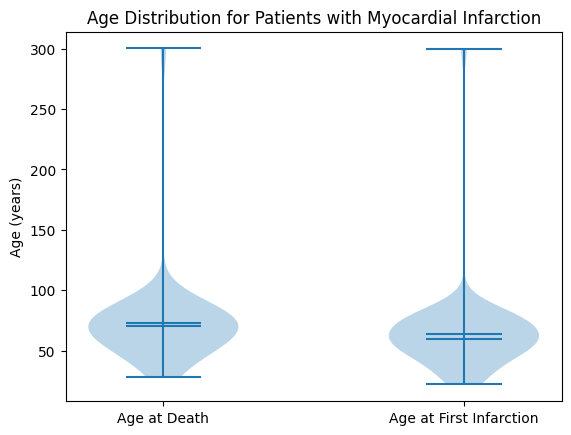

In [14]:
plt.violinplot([ages_at_death, ages_at_first_infarction_positive], showmeans=True, showmedians=True)
plt.xticks([1, 2], ['Age at Death', 'Age at First Infarction'])
plt.ylabel('Age (years)')
plt.title('Age Distribution for Patients with Myocardial Infarction')
plt.show()

C:\Users\kappl\AppData\Local\Temp\ipykernel_16320\416425474.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ages_at_death, ages_at_first_infarction_positive], labels=['Age at Death', 'Age at First Infarction'])


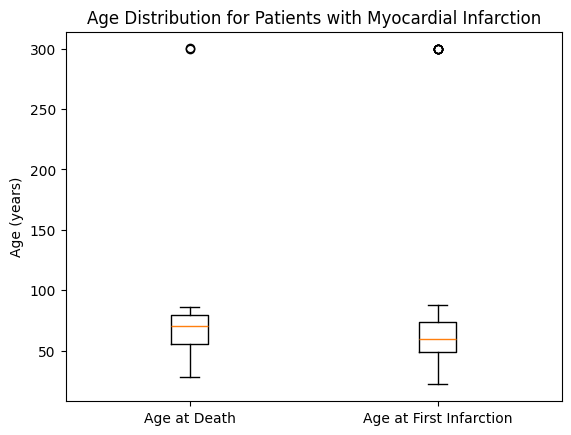

In [15]:
plt.boxplot([ages_at_death, ages_at_first_infarction_positive], labels=['Age at Death', 'Age at First Infarction'])
plt.ylabel('Age (years)')
plt.title('Age Distribution for Patients with Myocardial Infarction')
plt.show()

In [16]:
"""
admissions_patients = admissions.merge(patients[['SUBJECT_ID', 'DOB']], on='SUBJECT_ID', how='left')
admissions_patients['ADMITTIME'] = pd.to_datetime(admissions_patients['ADMITTIME'])
admissions_patients['DOB'] = pd.to_datetime(admissions_patients['DOB'])

admissions_patients['AGE_AT_ADMISSION'] = (admissions_patients['ADMITTIME'].values - admissions_patients['DOB'].values) / np.timedelta64(1, 'D') // 365.25
print(admissions_patients['AGE_AT_ADMISSION'].describe())
"""

"\nadmissions_patients = admissions.merge(patients[['SUBJECT_ID', 'DOB']], on='SUBJECT_ID', how='left')\nadmissions_patients['ADMITTIME'] = pd.to_datetime(admissions_patients['ADMITTIME'])\nadmissions_patients['DOB'] = pd.to_datetime(admissions_patients['DOB'])\n\nadmissions_patients['AGE_AT_ADMISSION'] = (admissions_patients['ADMITTIME'].values - admissions_patients['DOB'].values) / np.timedelta64(1, 'D') // 365.25\nprint(admissions_patients['AGE_AT_ADMISSION'].describe())\n"

Next
Age at diagnoses of patients with MI (410) - this is our cohort

Split further into people that dieed.

Find time between age of first diagnoses and their death - this is the one I still have left to do.

In [17]:
print(len(death_dates))
print(len(first_admissions['ADMITTIME'].values))

77
343


In [18]:
#filter first_admissions for people in death_dates
first_admissions_dead = first_admissions[first_admissions['SUBJECT_ID'].isin(deaths['SUBJECT_ID'])]
#print(len(first_admissions_dead))

#sort both by SUBJECT_ID to ensure alignment
first_admissions_dead = first_admissions_dead.sort_values(by='SUBJECT_ID')

#remove duplicates from death_dates
#death_dates = death_dates[~death_dates.index.duplicated(keep='first')]

#recreate death_dates series with SUBJECT_ID as index so we can make sure they align
death_dates_series = pd.Series(death_dates, index=deaths['SUBJECT_ID'].values)
death_dates_series = death_dates_series.sort_index()

#sort remove anything from death_dates that is not in first_admissions_dead
death_dates = death_dates_series.loc[first_admissions_dead['SUBJECT_ID']]



#print(len(death_dates))
#print(len(first_admissions_dead))


#subtract first admission time from death date to get number of years between first infarction and death
ages_between_infarction_and_death = [(death_dates.iloc[i] - first_admissions_dead['ADMITTIME'].iloc[i]).days / 365.25 if (pd.notna(death_dates.iloc[i]) and pd.notna(first_admissions_dead['ADMITTIME'].iloc[i])) else None for i in range(len(first_admissions_dead))]
ages_between_infarction_and_death = pd.Series(ages_between_infarction_and_death)
print(ages_between_infarction_and_death.describe())

count    77.000000
mean      0.808590
std       1.694306
min      -0.002738
25%       0.016427
50%       0.054757
75%       0.531143
max       7.134839
dtype: float64


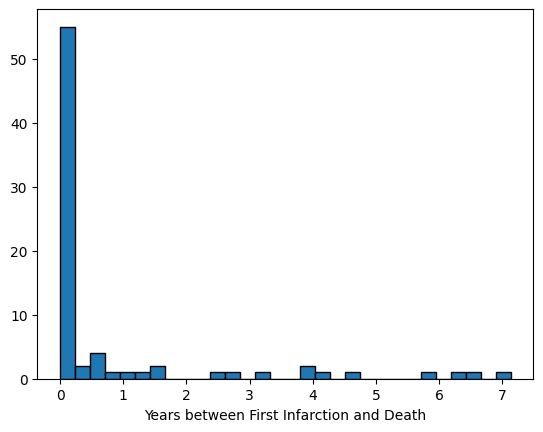

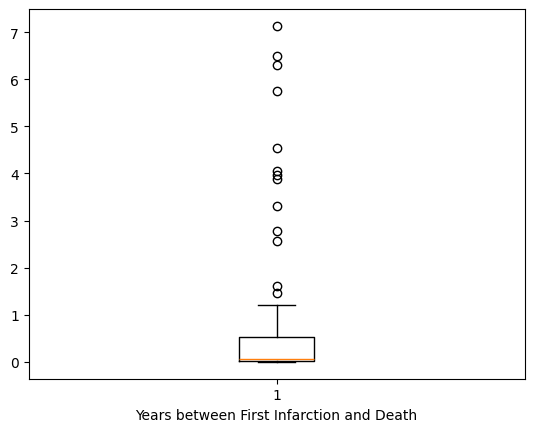

In [19]:
#then plot
plt.hist(ages_between_infarction_and_death.dropna(), bins=30, edgecolor='black')
plt.xlabel('Years between First Infarction and Death')
plt.show()

plt.boxplot(ages_between_infarction_and_death.dropna(), vert=True)
plt.xlabel('Years between First Infarction and Death')
plt.show()